In [41]:
# Basics
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# OOP
from pipeline import Pipeline

In [47]:
ticker = 'NKE'
start = None
end = None
load_params = {
    'tickers': ['NKE'],
    'start': None,
    'end': None,
}
raw_data = yf.download(**load_params, auto_adjust=False, multi_level_index=False, progress=False)

In [46]:
def returns(adj_close: pd.core.series.Series) -> list:
    log_returns = np.log(adj_close) - np.log(adj_close.shift(1))
    return log_returns

**Technical Analysis (TA)** <br>
&#9675; Relative Strength Index (RSI) – indicates whether the equity is overbought or oversold; useful for capturing short-term momentum extremes <br>
&#9675; Moving Average Differential/Spread – difference between the short-term MA and long-term MA; helps determine directional momentum – if the short-term MA > long-term MA = Bullish momentum, else Bearish momentum <br>
&#9675; Exponentially Weighted Volatility (EWM Vol) – measures recent volatility with more emphasis on recent returns; captures regime shifts and fast-changing market risk more responsively than simple rolling volatility

**Supplement Tickers** <br>
&#9675; SPY (ETF of S&P 500) – Provides overall market direction; useful for contextualizing NKE price action within broader market movements <br>
&#9675; ^VIX (Volatility Index) – Represents implied volatility in the options market on SPY; captures investor sentiment and fear, which can spill over into individual equities <br>
&#9675; ^TNX (10-year Treasury) – Reflects bond market expectations for inflation and rates; rising yields can pressure equity valuations, especially in rate-sensitive sectors

In [43]:
spy_df = yf.download('SPY', auto_adjust=False, multi_level_index=False, progress=False)['Adj Close']
vix_df = yf.download('^VIX', auto_adjust=False, multi_level_index=False, progress=False)['Adj Close']
tnx_df = yf.download('^TNX', auto_adjust=False, multi_level_index=False, progress=False)['Adj Close']

Text(0, 0.5, 'USD')

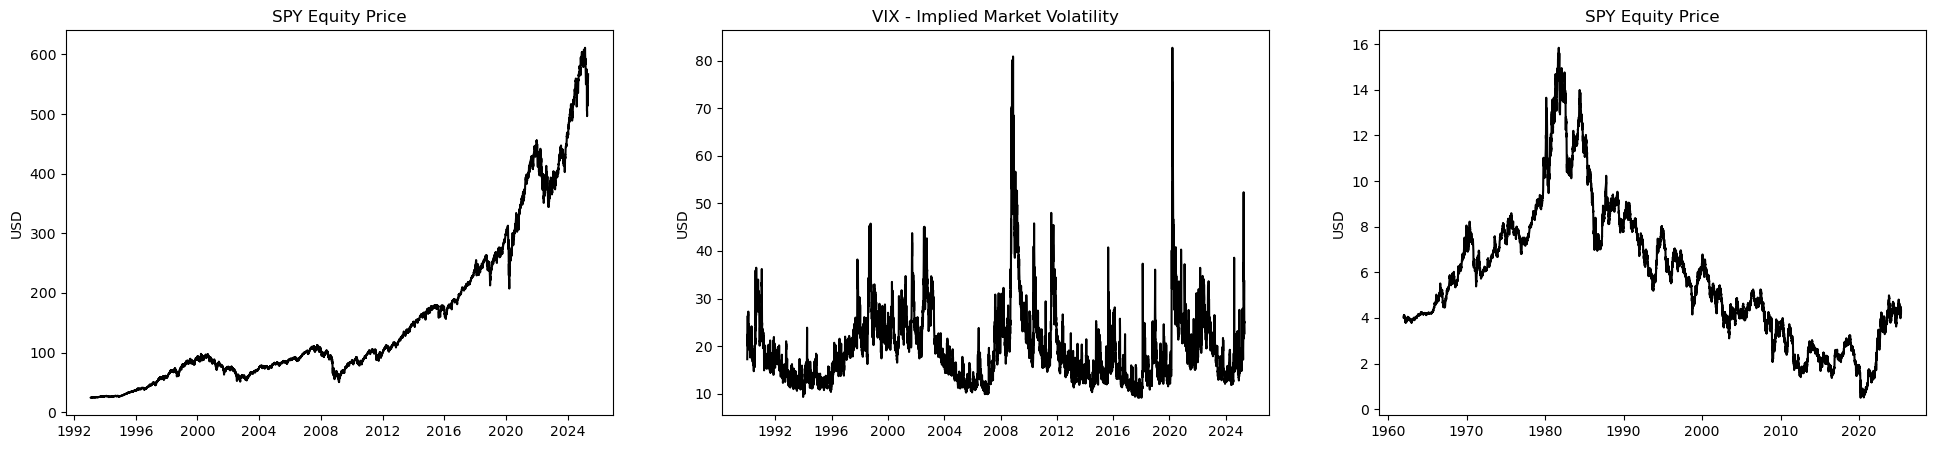

In [65]:
fig, ax = plt.subplots(1,3,figsize=(24,5))

ax[0].plot(spy_df, color = 'black')
ax[0].set_title('SPY Equity Price')
ax[0].set_ylabel('USD')

ax[1].plot(vix_df, color = 'black')
ax[1].set_title('VIX - Implied Market Volatility')
ax[1].set_ylabel('USD')

ax[2].plot(tnx_df, color = 'black')
ax[2].set_title('SPY Equity Price')
ax[2].set_ylabel('USD')

In [44]:
Pipeline.returns(spy_df)

Date
1993-01-29         NaN
1993-02-01    0.007087
1993-02-02    0.002117
1993-02-03    0.010515
1993-02-04    0.004176
                ...   
2025-04-28    0.000381
2025-04-29    0.006280
2025-04-30    0.000397
2025-05-01    0.007062
2025-05-02    0.014735
Name: Adj Close, Length: 8121, dtype: float64